In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import file from csv
df = pd.read_csv('./Simulation3')
df = df.groupby(['time', 'cell_type']).size().reset_index(name='count')

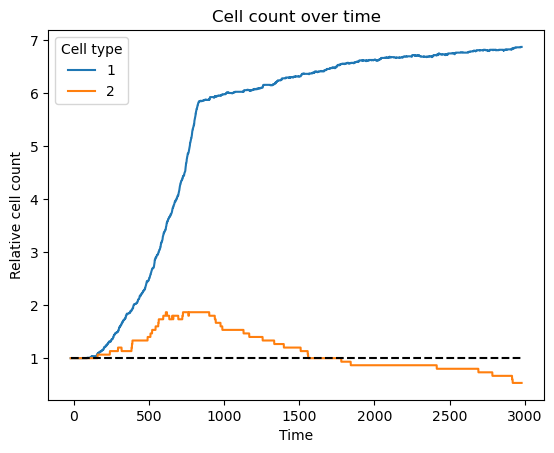

In [19]:
# Plot
fig, ax = plt.subplots()
for cell_type in [1, 2]:
    time = df[df['cell_type'] == cell_type]['time']
    count = df[df['cell_type'] == cell_type]['count']
    count = count / count.iloc[0]
    ax.plot(time, count, label=cell_type)

ax.set_title("Cell count over time")
ax.set_xlabel("Time")
ax.set_ylabel("Relative cell count")
ax.hlines(1, np.min(time), np.max(time), "black", "--")
ax.legend(title="Cell type")

In [9]:
cell1 = pd.DataFrame()
cell1['time'] = df[df['cell_type'] == 1]['time']

cell2 = pd.DataFrame()
cell2['time'] = df[df['cell_type'] == 1]['time']

In [11]:
values = [0.4, 0.8, 1.2, 2, 2.5]

for v in values:
    df = pd.read_csv('./ScanStiffness_kd_' + str(v))
    df = df.groupby(['time', 'cell_type']).size().reset_index(name='count')

    cell1[v] = df[df['cell_type'] == 1]['count']
    cell2[v] = df[df['cell_type'] == 2]['count']

In [12]:
cell1

,time,0.4,0.8,1.2,2,2.5
0,-20.0,128.0,129.0,127.0,130.0,130
2,-19.0,128.0,129.0,127.0,130.0,130
4,-18.0,128.0,129.0,127.0,130.0,130
6,-17.0,128.0,129.0,127.0,130.0,130
8,-16.0,128.0,129.0,127.0,130.0,130
...,...,...,...,...,...,...
6590,2975.0,NaN,NaN,NaN,NaN,928
6592,2976.0,NaN,NaN,NaN,NaN,928
6594,2977.0,NaN,926.0,NaN,929.0,928
6596,2978.0,NaN,NaN,947.0,NaN,928


In [14]:
values = [0.4, 0.8, 1.2, 2, 2.5]
stiffness = {}

for v in values:
    df = pd.read_csv('./ScanStiffness_kd_' + str(v))
    df = df.groupby(['time', 'cell_type']).size().reset_index(name='count')

    res = {}
    for c in [1, 2]:
        time = df[df['cell_type'] == c]['time']
        count = df[df['cell_type'] == c]['count']
        res["Type"+str(c)] = {"time": time, "count": count}

    stiffness[v] = res

In [21]:
import _pickle as pkl

with open('../Results/ref_scan_stiffness_kd.pkl', 'wb') as f:
    pkl.dump(stiffness, f)

In [16]:
from pprint import pprint
pprint(stiffness)

{0.4: {'Type1': {'count': 0       128
2       128
4       128
6       128
8       128
       ... 
5040    894
5042    894
5044    894
5045    894
5046    894
Name: count, Length: 3000, dtype: int64,
                 'time': 0        -20.0
2        -19.0
4        -18.0
6        -17.0
8        -16.0
         ...  
5040    2975.0
5042    2976.0
5044    2977.0
5045    2978.0
5046    2979.0
Name: time, Length: 3000, dtype: float64},
       'Type2': {'count': 1       17
3       17
5       17
7       17
9       17
        ..
3221     3
3223     3
3225     3
3227     3
3229     3
Name: count, Length: 1501, dtype: int64,
                 'time': 1        -20.0
3        -19.0
5        -18.0
7        -17.0
9        -16.0
         ...  
3221    1476.0
3223    1477.0
3225    1478.0
3227    1479.0
3229    1480.0
Name: time, Length: 1501, dtype: float64}},
 0.8: {'Type1': {'count': 0       129
2       129
4       129
6       129
8       129
       ... 
6641    928
6643    928
6645    928
6647    928


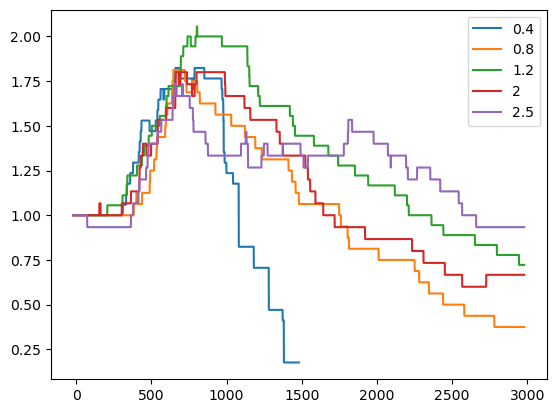

In [19]:
fig, ax = plt.subplots()
for v in stiffness.keys():
    time = stiffness[v]["Type2"]["time"]
    count = stiffness[v]["Type2"]["count"]
    count = count / count.iloc[0]
    ax.plot(time, count, label=v)

ax.legend()

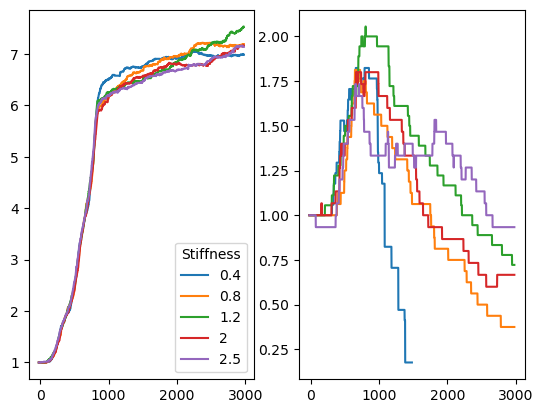

In [5]:
values = [0.4, 0.8, 1.2, 2, 2.5]

fig, ax = plt.subplots(1, 2)

for v in values:
    df = pd.read_csv('./ScanStiffness_kd_' + str(v))
    df = df.groupby(['time', 'cell_type']).size().reset_index(name='count')

    cell_types = [1, 2]
    for cell_type in cell_types:
        time = df[df['cell_type'] == cell_type]['time']
        count = df[df['cell_type'] == cell_type]['count']
        count = count / count.iloc[0]
        ax[cell_type-1].plot(time, count, label=v)

ax[0].legend(title="Stiffness")

    
